<a href="https://colab.research.google.com/github/jianxu305/nCov2019_analysis/blob/master/src/coronavirus_demo_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the Coronavirus Epidemic Data

The novel coronavirus (previously named 2019-nCov, and later changed to COVID-19¹) is currently sweeping through China. It triggered a global health emergency², and claimed more than a thousand lives as of Feb 13, 2020³. People around the world are constantly bombarded with news, rumors, confusions, and panics.
In order to help people better assess the situation, and to promote rational reactions, the epidemic data must be easily accessible to the general public. Many websites have been publishing some epidemic numbers in real time. For example, [Ding Xiang Yuan](https://ncov.dxy.cn/ncovh5/view/pneumonia), [Johns Hopkins CSSE](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6), etc. These websites provide timely information to the general public, but they fall short of providing sufficient data for analysis. For example, answering any of the following simple questions will be very difficult or nearly impossible by using the websites mentioned above:

* Q1. What is the number of confirmed cases in the past 7 days in the Hubei Province?

* Q2. How do the daily new confirmed cases compare between the Guangdong Province and the Zhejiang Province?

* Q3. What are the top 5 cities that have the highest death counts as of Feb 13, 2020?

* (And much more …)

In order to be able to analyze the data, a more convenient data set is necessary. The [DXY-2019-nCoV-Data](https://github.com/BlankerL/DXY-2019-nCoV-Data) GitHub project snaps the real time epidemic report from Ding Xiang Yuan several times a day, and saves it into a CSV file. But  this CSV file only contains snapshots of the data from the website. It's not easy to be used for analysis because the randomness of reporting times, and the changing reporting format.

Therefore, this project [nCov2019_analysis](https://github.com/jianxu305/nCov2019_analysis) is created in GitHub. Its main purposes are the following:

* Performs critical data cleaning

* Provides a convenient structured data for users to explore and contribute

* Analyzes some aspects of the coronavirus epidemic using this toolbox

This GitHub project contains a Python Notebook to illustrate the basic usage. The notebook is in Google Colab for the convenience of readers. Following is a demo of the package.

In [2]:
! git clone https://github.com/jianxu305/nCov2019_analysis/

import sys
import os
os.chdir('/content/nCov2019_analysis/src')

sys.path.append('/content/nCov2019_analysis/src')

Cloning into 'nCov2019_analysis'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 153 (delta 75), reused 95 (delta 37), pack-reused 0
Receiving objects: 100% (153/153), 11.89 MiB | 19.30 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import utils   # some convenient functions

%load_ext autoreload
%autoreload 2

## 1. Obtain Raw Data

In [4]:
data = utils.load_chinese_data()

Last update:  2020-02-15 11:50:01.777000
Data date range:  2020-01-24 to 2020-02-15
Number of rows in raw data:  39953


In [5]:
data.head(3)  # Check the data

,province_name,city_name,province_confirmed,province_suspected,province_cured,province_dead,city_confirmed,city_suspected,city_cured,city_dead,update_time,update_date
0,广东省,深圳,1294,0,405,2,406,0,104,0,2020-02-15 11:50:01.777,2020-02-15
1,广东省,广州,1294,0,405,2,335,0,106,0,2020-02-15 11:50:01.777,2020-02-15
2,广东省,东莞,1294,0,405,2,81,0,7,1,2020-02-15 11:50:01.777,2020-02-15


## 2. Data Processing

In [0]:
daily_frm = utils.aggDaily(data)

In [7]:
daily_frm.tail()

,update_date,province_name,province_name_en,city_name,city_name_en,cum_confirmed,cum_cured,cum_dead,new_confirmed,new_cured,new_dead,update_time
557,2020-02-15,黑龙江省,Helongjiang,绥化,Suihua,46,7,4,1.0,0.0,0.0,2020-02-15 08:11:15.875
556,2020-02-15,黑龙江省,Helongjiang,鸡西,Jixi,45,1,0,1.0,0.0,0.0,2020-02-15 08:11:15.875
564,2020-02-15,黑龙江省,Helongjiang,鹤岗,Hegang,5,2,0,0.0,0.0,0.0,2020-02-15 08:11:15.875
561,2020-02-15,黑龙江省,Helongjiang,黑河,Heihe,13,0,0,0.0,0.0,0.0,2020-02-15 08:11:15.875
558,2020-02-15,黑龙江省,Helongjiang,齐齐哈尔,Qiqihaer,36,8,1,0.0,0.0,0.0,2020-02-15 08:11:15.875


### Q1. What is the number of confirmed cases in the past 7 days in the Hubei Province ?

In [9]:
x = daily_frm[daily_frm['province_name_en'] == 'Hubei'].groupby('update_date').agg('sum')[-7:]
x

,cum_confirmed,cum_cured,cum_dead,new_confirmed,new_cured,new_dead
update_date,,,,,,
2020-02-09,27100,1480,780,2147.0,262.0,81.0
2020-02-10,29631,1854,871,2531.0,374.0,91.0
2020-02-11,31728,2310,974,2097.0,456.0,103.0
2020-02-12,33366,2686,1068,1638.0,376.0,94.0
2020-02-13,48206,3459,1310,14840.0,773.0,242.0
2020-02-14,51986,3900,1318,3780.0,441.0,8.0
2020-02-15,54406,4774,1457,2420.0,874.0,139.0


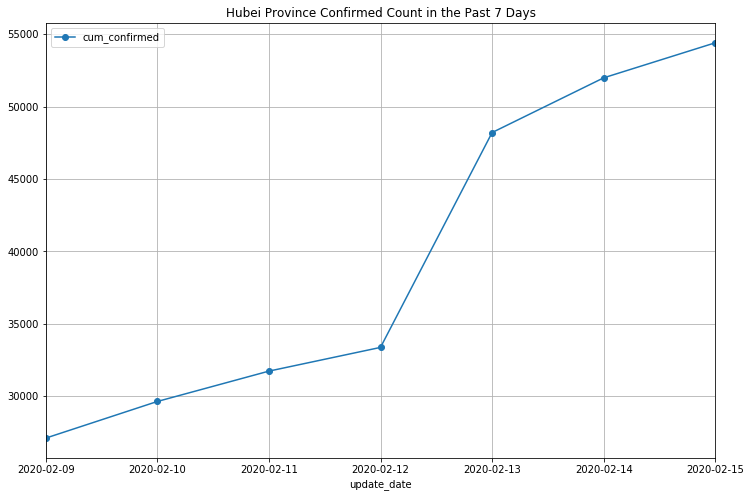

In [11]:
x.plot(y='cum_confirmed', figsize=(12, 8), marker='o', grid=True, 
       title='Hubei Province Confirmed Count in the Past 7 Days')

### Q2. How do the daily new confirmed cases compare between the Guangdong Province and the Zhejiang Province?

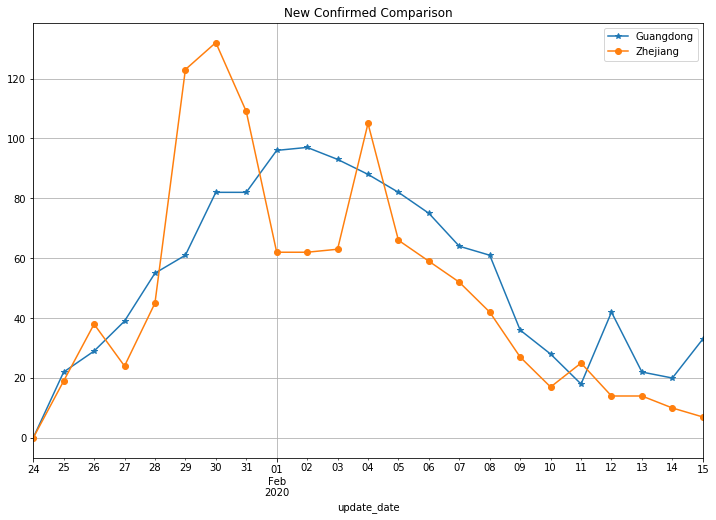

In [24]:
frm1 = daily_frm[(daily_frm['province_name_en'] == 'Guangdong') | (daily_frm['province_name_en'] == 'Zhejiang')].copy()
frm1['update_date'] = pd.to_datetime(frm1['update_date'])
frm2 = frm1.groupby(['update_date', 'province_name_en']).agg('sum')
ax = frm2['new_confirmed'][:, 'Guangdong'].plot(figsize=(12,8), label='Guangdong', grid=True, marker='*')
frm2['new_confirmed'][:, 'Zhejiang'].plot(ax=ax, label='Zhejiang', grid=True, title='New Confirmed Comparison', marker='o')
ax.legend(loc='upper right')

### Q3. What are the top 5 cities that have the highest death counts as of Feb 13, 2020?

In [23]:
daily_frm[(daily_frm['update_date'] == pd.to_datetime('2020-02-13'))].sort_values('cum_dead', ascending=False)[:5]

,update_date,province_name,province_name_en,city_name,city_name_en,cum_confirmed,cum_cured,cum_dead,new_confirmed,new_cured,new_dead,update_time
2474,2020-02-13,湖北省,Hubei,武汉,Wuhan,32994,1923,1036,13436.0,543.0,216.0,2020-02-13 22:12:44.102
2476,2020-02-13,湖北省,Hubei,黄冈,Huanggang,2662,427,58,264.0,85.0,4.0,2020-02-13 22:12:44.102
2475,2020-02-13,湖北省,Hubei,孝感,Xiaogan,2874,209,49,123.0,30.0,4.0,2020-02-13 22:12:44.102
2480,2020-02-13,湖北省,Hubei,鄂州,Ezhou,1065,97,30,204.0,25.0,2.0,2020-02-13 22:12:44.102
2481,2020-02-13,湖北省,Hubei,荆门,Jingmen,927,93,24,231.0,9.0,0.0,2020-02-13 22:12:44.102


As you can see, this data set is very flexible, and can easily answer many questions that are otherwise difficult to be tackled.

## 3. Plotting Functions
To expedite the analysis of the data, two convenient plotting functions are provided for visualization:
* Time series plot: utils.tsplot_conf_dead_cured()
* Cross-sectional plot: utils.cross_sectional_bar()

For example, you can plot the total cumulative number of confirmed, dead, and cured cases in China by the following commands:

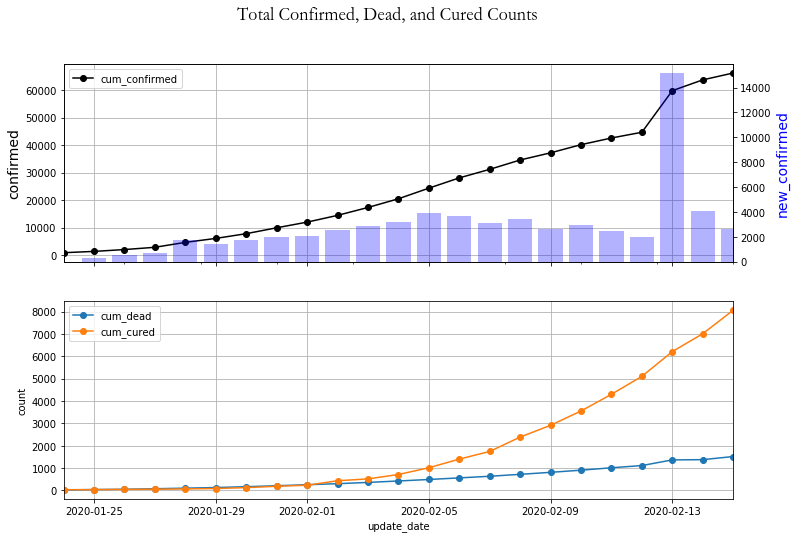

In [27]:
fig = utils.tsplot_conf_dead_cured(daily_frm, title= 'Total Confirmed, Dead, and Cured Counts', figsize=(12, 8))
plt.show()

Similarly, users can use the data from a specific city / province to obtain the same plot of that region. Also an optional parameter logy can be supplied to control the y-axis, so that it's easier for user to see if the numbers are growing exponentially. Following is an example of the same plot for the epidemic center Wuhan.

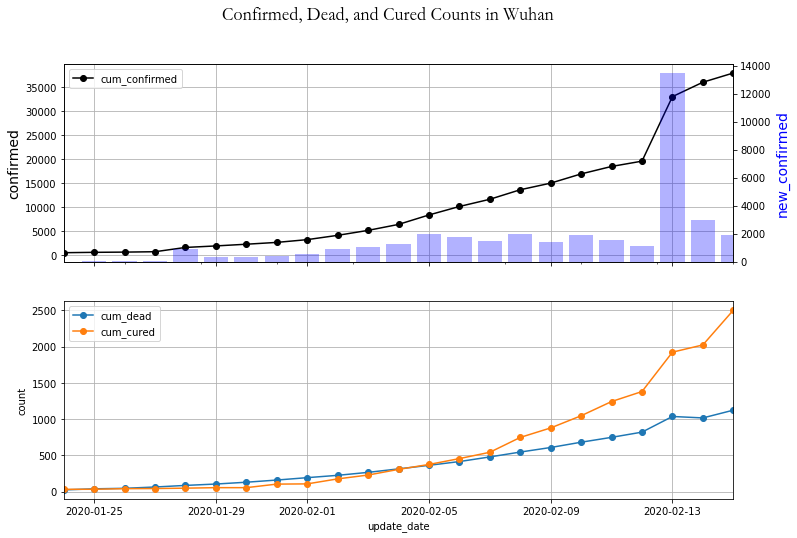

In [29]:
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['city_name_en'] == 'Wuhan'], 
                                   logy=False, 
                                   title='Confirmed, Dead, and Cured Counts in Wuhan',
                                   figsize=(12, 8))
plt.show()

Cross-sectional plots are easy as well. Following is an example of comparing confirmed counts of all provinces:

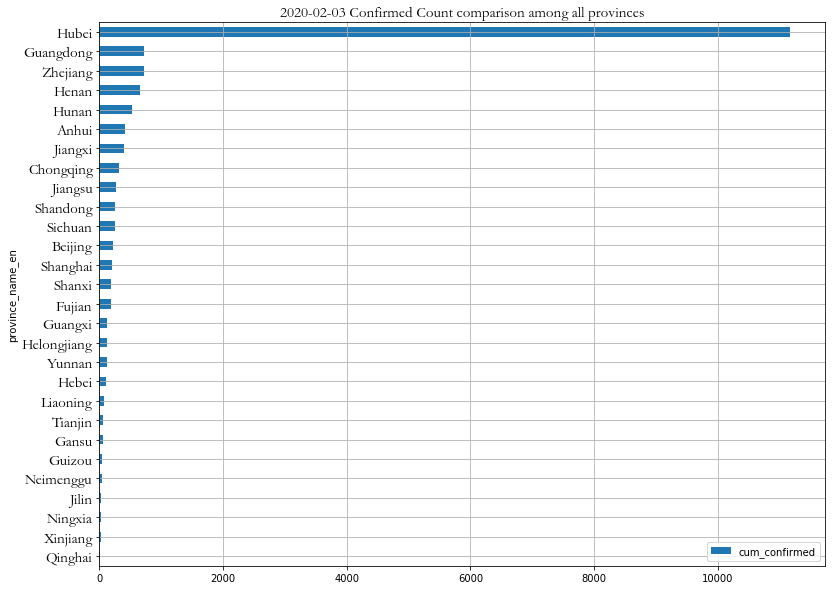

In [32]:
fig = utils.cross_sectional_bar(daily_frm, '2020-02-03', col='cum_confirmed', groupby='province_name_en', 
                                title='2020-02-03 Confirmed Count comparison among all provinces')
plt.show()

An optional parameter *largestN* can be provided to display only the top N bars. For example, the following compares the top 10 cities in terms of the highest newly confirmed counts on 2020–02–05:

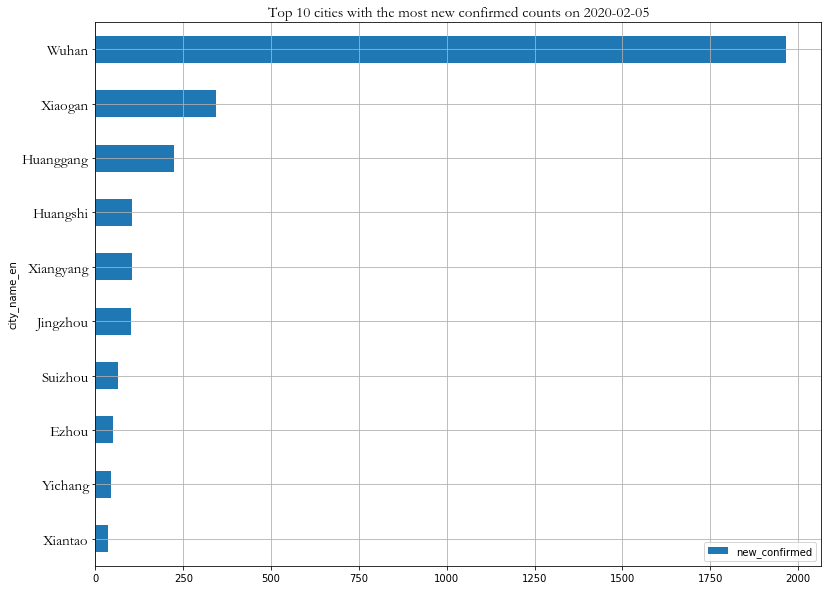

In [33]:
fig = utils.cross_sectional_bar(daily_frm, '2020-02-05', col='new_confirmed', groupby='city_name_en', largestN=10, title='Top 10 cities with the most new confirmed counts on 2020-02-05' )
plt.show()

## Final Words
Above are some basic usages of the toolbox. Hope you find it convenient and helpful to gain a better understanding of recent the coronavirus epidemic. 
In the next article, I am going use this toolbox to analyze the death rate. You will see that it is not as simple as the widely circulated 2%.

## Acknowledgement
I want to thank my friend David Tian, a Machine Learning engineer, for his helps on the Google Colab setup, and his valuable suggestions. Check out his fun self-driving [DeepPiCar](https://towardsdatascience.com/deeppicar-part-1-102e03c83f2c) blog.